In [3]:
import numpy as np
import pandas  as pd
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [4]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
      pf_data[a] = yf.download(a, start ='1995-1-1', end = '2010-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
pf_data.tail()

,PG,^GSPC
Date,,
2009-12-24,40.006851,1126.479980
2009-12-28,39.987282,1127.780029
2009-12-29,40.202721,1126.199951
2009-12-30,40.065613,1126.420044
2009-12-31,39.582508,1115.099976


<AxesSubplot:xlabel='Date'>

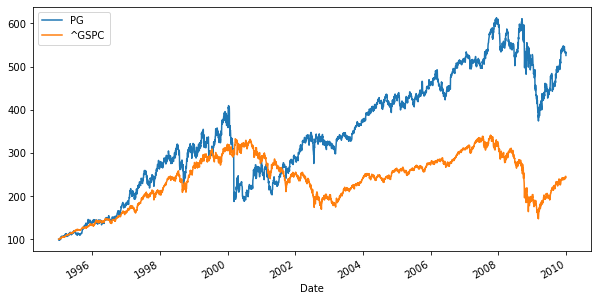

In [8]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5)) # normalizing to start at 100

In [8]:
#need log returns for efficient frontier

log_returns = np.log(pf_data / pf_data.shift(1))

In [9]:
log_returns.mean() * 250 #average trading days

PG       0.107145
^GSPC    0.077514
dtype: float64

In [11]:
log_returns.cov() * 250 #covariance over 250 trading days

,PG,^GSPC
PG,0.049676,0.018889
^GSPC,0.018889,0.033351


In [12]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.464066
^GSPC,0.464066,1.000000


In [14]:
num_assets = len(assets)
print(num_assets)

2


In [17]:
arr = np.random.random(2) #create random weights
arr

array([0.05282931, 0.92442507])

In [16]:
arr[0] + arr[1]

0.6695467223391077

In [18]:
weights = np.random.random(num_assets) #create random weights whose sum is 100% or 1
weights /= np.sum(weights)
weights

array([0.70675101, 0.29324899])

In [19]:
weights[0] + weights[1]

1.0

Expected Portfoluio Return:

In [21]:
np.sum(weights * log_returns.mean()) * 250

0.09845612851917103

Expected Portfolio Variance

In [23]:
np.dot(weights.T, np.dot(log_returns.cov() * 250 ,weights))

0.035510466944684314

Expected Portfolio Voltility:

In [24]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))) #mean variance combinations

0.18844221115420057

We are considering 1000 different combinationsof the same assets!!

In [27]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000): #lets loop it
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns) #turn into numpy arrays

pfolio_volatilities = np.array(pfolio_volatilities)
    
pfolio_returns, pfolio_volatilities

(array([0.08475227, 0.08847688, 0.08621853, 0.09191454, 0.09146474,
        0.0874629 , 0.09247865, 0.09685806, 0.08723141, 0.08640237,
        0.09739019, 0.10076295, 0.08577925, 0.09488648, 0.09208185,
        0.08752028, 0.09136613, 0.09285697, 0.08840661, 0.08949578,
        0.10305508, 0.10562421, 0.0955914 , 0.08253541, 0.09376868,
        0.0883769 , 0.09329759, 0.10539823, 0.09383355, 0.09658526,
        0.09849581, 0.09209902, 0.09733658, 0.08079375, 0.10032601,
        0.08985762, 0.08933399, 0.08179363, 0.09977323, 0.0991136 ,
        0.09607328, 0.09316831, 0.09167815, 0.09597589, 0.08899922,
        0.09619519, 0.09107505, 0.07824232, 0.09691845, 0.0989821 ,
        0.08711288, 0.09304364, 0.09883154, 0.08913447, 0.08399275,
        0.10286186, 0.08623506, 0.10026969, 0.08842745, 0.09837476,
        0.07909414, 0.09666955, 0.09201473, 0.09117086, 0.08846502,
        0.0961394 , 0.08971264, 0.10071502, 0.09055163, 0.10144599,
        0.09323644, 0.07765954, 0.09704528, 0.09

Lets graph Efficient Frontier

In [28]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [29]:
portfolios.head()

,Return,Volatility
0,0.084752,0.170252
1,0.088477,0.169834
2,0.086219,0.169585
3,0.091915,0.173151
4,0.091465,0.172520


In [31]:
portfolios.tail()

,Return,Volatility
995,0.097545,0.185678
996,0.101813,0.200149
997,0.091923,0.173163
998,0.104484,0.210976
999,0.079386,0.178059


Text(0, 0.5, 'Expected Return')

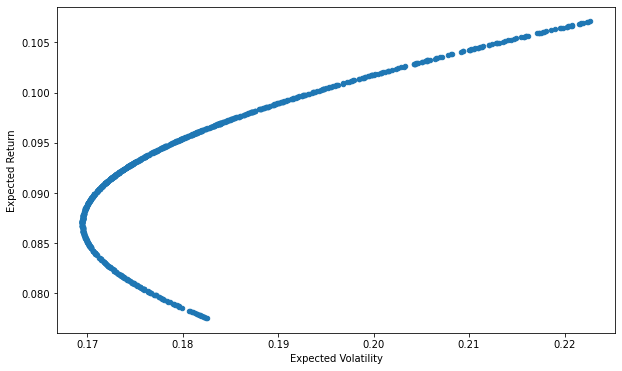

In [32]:
portfolios.plot(x='Volatility', y = 'Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')